In [28]:
#!pip install wordcloud
#!pip install altair vega_datasets
#!pip install matplotlib
#!pip install spacy
!pip install requests

In [29]:
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
import numpy as np
from nltk import *
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import altair as alt
import spacy
import requests
#from spacy.lang.fr.examples import sentences

In [3]:
df = pd.read_csv("vente_data.csv")
df

,type,adresse,prix,details,description,supplements
0,Vente Maison,Les Pavillons-sous-Bois (93320),359.000 €,4 pièces 2 chambres 75 m² Terrain 222 m² 4.787...,Maison située au centre ville de Pavillons sou...,| Les Pavillons-sous-Bois| Allée de la Tour - ...
1,Vente Appartement,Paris 15e (75015),750.000 €,3 pièces 2 chambres 73 m² 10.274 € le m²,Rare très calme et lumineux.\n\nIdéalement sit...,| Vaugirard (Adolphe Chérioux)| Volontaires| C...
2,Vente Maison,Nanterre (92000),550.000 €,3 pièces 2 chambres 80 m² Terrain 209 m² 6.875...,Maison de 80m2 plateau Mont-Valérien limite Su...,| Puteaux| Belvédère| Nanterre - Préfecture
3,Vente Appartement,Paris 11e (75011),518.000 €,2 pièces 1 chambre 44 m²,Appartement en duplex situé dans une rue calme...,| Goncourt (Hôpital-Saint-Louis)| République| ...
4,Vente Appartement,Alfortville (94140),260.000 €,2 pièces 1 chambre 43 m² 6.047 € le m²,"Appartement T2 en très bon état, traversant, e...",| Ecole Vétérinaire de Maisons-Alfort| Maisons...
...,...,...,...,...,...,...
259,Vente Appartement,Courbevoie (92400),525.000 €,3 pièces 2 chambres 70 m² 7.500 € le m²,Place Charras. Moins de 10 mn à pied de La Déf...,| Courbevoie| Esplanade de la Défense| Faubour...
260,Vente Maison,Le Raincy (93340),376.000 €,3 pièces 2 chambres 63 m²,Le Raincy. (Triangle d'or). Rare.\n16 km de Pa...,NaN
261,Vente Appartement,Franconville (95130),153.000 €,1 pièce 23 m² 6.652 € le m²,"RARE\n\nCet appartement très lumineux , de 23m...",| Franconville - Plessis-Bouchard| Cernay| Erm...
262,Vente Appartement,Bry-sur-Marne (94360),310.000 €,3 pièces 2 chambres 68 m² 4.559 € le m²,"Appartement duplex à Bry sur Marne, 3 pièces b...",| Les Boullereux Champigny| Bry-sur-Marne| Nog...


In [4]:
df.drop([8,10], axis=0, inplace=True)
df = df.reset_index() 
df

,index,type,adresse,prix,details,description,supplements
0,0,Vente Maison,Les Pavillons-sous-Bois (93320),359.000 €,4 pièces 2 chambres 75 m² Terrain 222 m² 4.787...,Maison située au centre ville de Pavillons sou...,| Les Pavillons-sous-Bois| Allée de la Tour - ...
1,1,Vente Appartement,Paris 15e (75015),750.000 €,3 pièces 2 chambres 73 m² 10.274 € le m²,Rare très calme et lumineux.\n\nIdéalement sit...,| Vaugirard (Adolphe Chérioux)| Volontaires| C...
2,2,Vente Maison,Nanterre (92000),550.000 €,3 pièces 2 chambres 80 m² Terrain 209 m² 6.875...,Maison de 80m2 plateau Mont-Valérien limite Su...,| Puteaux| Belvédère| Nanterre - Préfecture
3,3,Vente Appartement,Paris 11e (75011),518.000 €,2 pièces 1 chambre 44 m²,Appartement en duplex situé dans une rue calme...,| Goncourt (Hôpital-Saint-Louis)| République| ...
4,4,Vente Appartement,Alfortville (94140),260.000 €,2 pièces 1 chambre 43 m² 6.047 € le m²,"Appartement T2 en très bon état, traversant, e...",| Ecole Vétérinaire de Maisons-Alfort| Maisons...
...,...,...,...,...,...,...,...
257,259,Vente Appartement,Courbevoie (92400),525.000 €,3 pièces 2 chambres 70 m² 7.500 € le m²,Place Charras. Moins de 10 mn à pied de La Déf...,| Courbevoie| Esplanade de la Défense| Faubour...
258,260,Vente Maison,Le Raincy (93340),376.000 €,3 pièces 2 chambres 63 m²,Le Raincy. (Triangle d'or). Rare.\n16 km de Pa...,NaN
259,261,Vente Appartement,Franconville (95130),153.000 €,1 pièce 23 m² 6.652 € le m²,"RARE\n\nCet appartement très lumineux , de 23m...",| Franconville - Plessis-Bouchard| Cernay| Erm...
260,262,Vente Appartement,Bry-sur-Marne (94360),310.000 €,3 pièces 2 chambres 68 m² 4.559 € le m²,"Appartement duplex à Bry sur Marne, 3 pièces b...",| Les Boullereux Champigny| Bry-sur-Marne| Nog...


In [43]:
types_ =[]
#print(df["type"])
for ty in df["type"]:
    if ty=="Vente Maison":
        types_.append("Maison")
    else : types_.append("Appartement")
print(len(types_))

262


In [11]:
tokens = []
for i in range(len(df["adresse"])):
    tok = WordPunctTokenizer().tokenize(df["adresse"][i])
    tokens.append(tok)
print(tokens[8])

['Boulogne', '-', 'Billancourt', '(', '92100', ')']


In [12]:
print(len(tokens))
adr = []
for tk in tokens:
    for i in range(len(tk)):
        if tk[i]=='(':
            for j in range(i+1, len(tk)-1):
                if tk[j].isdigit:
                    adr.append(tk[j])  
print(len(adr))
print(adr[8])

262
262
92100


In [39]:
def geocommune(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['nom']
    if nom =='Paris':
        par = "codePostal={adr}&type={t}".format(
            adr = adre,
            t = "arrondissement-municipal"
        )
        re = requests.get(base_url, params=par)
        d = re.json()
        nom = d[0]['nom']
    return nom
nom_commune = []
for i in range(len(adr)):
    nom_commune.append(geocommune(adr[i]))
print(len(nom_commune))
print(nom_commune)
    

262
['Les Pavillons-sous-Bois', 'Paris 15e Arrondissement', 'Nanterre', 'Paris 11e Arrondissement', 'Alfortville', 'Vincennes', 'Châtenay-Malabry', 'Paris 17e Arrondissement', 'Boulogne-Billancourt', 'Bagneux', 'Nogent-sur-Marne', 'Paris 16e Arrondissement', 'Clichy', 'Montreuil', 'Courbevoie', 'Saint-Cloud', 'Sèvres', 'Paris 6e Arrondissement', 'Clairefontaine-en-Yvelines', 'Suresnes', 'Valenton', 'Paris 17e Arrondissement', 'Plaisir', 'Paris 16e Arrondissement', 'Paris 11e Arrondissement', 'Saint-Maur-des-Fossés', 'Colombes', 'Paris 12e Arrondissement', 'Saint-Cloud', 'Paray-Vieille-Poste', 'Levallois-Perret', 'Vincennes', 'Le Pecq', 'Paris 11e Arrondissement', 'Paris 18e Arrondissement', 'Issy-les-Moulineaux', 'Paris 19e Arrondissement', 'Ormesson-sur-Marne', 'Corbeil-Essonnes', 'Puteaux', 'Morainvilliers', 'Boulogne-Billancourt', 'Fontainebleau', 'Paris 17e Arrondissement', 'Versailles', 'Savigny-sur-Orge', 'Béhoust', 'Suresnes', 'Clichy-sous-Bois', 'Marly-le-Roi', 'Angervilliers',

In [38]:
nom_commune

NameError: name 'nom_commune' is not defined

In [41]:
def get_dep(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['codeDepartement']
    return nom
codedep = []
for i in range(len(adr)):
    codedep.append(get_dep(adr[i]))
print(len(codedep))
print(codedep)

262
['93', '75', '92', '75', '94', '94', '92', '75', '92', '92', '94', '75', '92', '93', '92', '92', '92', '75', '78', '92', '94', '75', '78', '75', '75', '94', '92', '75', '92', '91', '92', '94', '78', '75', '75', '92', '75', '94', '91', '92', '78', '92', '77', '75', '78', '91', '78', '92', '93', '78', '91', '75', '92', '92', '94', '92', '75', '78', '75', '92', '92', '94', '91', '92', '94', '75', '75', '92', '78', '75', '93', '95', '75', '78', '78', '93', '94', '94', '94', '92', '75', '93', '75', '75', '75', '75', '75', '93', '94', '78', '75', '75', '93', '92', '94', '94', '75', '75', '75', '78', '92', '94', '94', '93', '94', '75', '78', '91', '92', '93', '94', '75', '75', '93', '94', '93', '92', '75', '93', '95', '78', '94', '75', '91', '91', '92', '95', '91', '93', '94', '75', '78', '92', '93', '94', '95', '75', '78', '92', '75', '75', '92', '75', '75', '75', '75', '75', '92', '95', '75', '75', '91', '94', '75', '75', '78', '95', '75', '75', '77', '91', '92', '94', '95', '95', '75',

In [30]:
def get_code(adre):
    params = "codePostal={adr}".format(
        adr = adre
    )
    base_url = 'https://geo.api.gouv.fr/communes?'
    response = requests.get(base_url, params=params)
    data = response.json()
    nom = data[0]['code']
    return nom
codecomm = []
for i in range(len(adr)):
    codecomm.append(get_code(adr[i]))

In [13]:
price = []
for t in df["prix"]:
    token = WordPunctTokenizer().tokenize(t)
    nb = ''
    for i in token:
        if i.isdigit():
            nb = nb + i
    price.append(nb)
print(price[18])
len(price)

1160000


262

In [153]:
tokens = WordPunctTokenizer().tokenize(df['details'][0])
tokens

['4',
 'pièces',
 '2',
 'chambres',
 '75',
 'm²',
 'Terrain',
 '222',
 'm²',
 '4',
 '.',
 '787',
 '€',
 'le',
 'm²']

In [14]:
df['details'][0][2]
#print(df['details'][0])
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    print(tokens)

['4', 'pièces', '2', 'chambres', '75', 'm²', 'Terrain', '222', 'm²', '4', '.', '787', '€', 'le', 'm²']
['3', 'pièces', '2', 'chambres', '73', 'm²', '10', '.', '274', '€', 'le', 'm²']
['3', 'pièces', '2', 'chambres', '80', 'm²', 'Terrain', '209', 'm²', '6', '.', '875', '€', 'le', 'm²']
['2', 'pièces', '1', 'chambre', '44', 'm²']
['2', 'pièces', '1', 'chambre', '43', 'm²', '6', '.', '047', '€', 'le', 'm²']
['3', 'pièces', '2', 'chambres', '55', 'm²', '9', '.', '909', '€', 'le', 'm²']
['3', 'pièces', '2', 'chambres', '56', 'm²', '5', '.', '875', '€', 'le', 'm²']
['2', 'pièces', '1', 'chambre', '51', 'm²', '11', '.', '961', '€', 'le', 'm²']
['3', 'pièces', '2', 'chambres', '83', 'm²', '9', '.', '036', '€', 'le', 'm²']
['5', 'pièces', '3', 'chambres', '122', 'm²', 'Terrain', '160', 'm²', '5', '.', '328', '€', 'le', 'm²']
['2', 'pièces', '1', 'chambre', '29', 'm²', '6', '.', '897', '€', 'le', 'm²']
['2', 'pièces', '1', 'chambre', '52', 'm²', '11', '.', '538', '€', 'le', 'm²']
['3', 'pièces',

In [31]:
piece = 'pièces'
pieces = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    if tokens[1]== piece:
        pieces.append(tokens[0])
    else : pieces.append(0)
print(pieces)
print(len(pieces))
        

['4', '3', '3', '2', '2', '3', '3', '2', '3', '5', '2', '2', '3', '5', '3', '2', '3', '2', '10', '4', '2', '2', '5', '4', '4', '6', '3', 0, '3', '6', '4', '3', '4', '3', 0, '2', '3', '7', '2', '3', '7', '3', '5', '2', '4', '6', '7', '5', '6', '4', '6', '2', '3', '5', '4', '6', '2', '8', '2', '5', '3', '4', '4', '4', '2', '3', 0, '6', '3', '4', '3', '5', 0, '6', '2', '4', '2', '3', '4', '12', '2', '3', 0, '2', 0, '4', '2', '9', 0, '6', '2', '4', '5', '7', '3', '4', '2', 0, '4', '4', '5', '3', '4', '9', '4', '3', '8', '6', 0, '6', '3', '3', 0, '7', '7', '6', '4', 0, 0, '7', '4', '4', '2', '5', '4', '8', '3', '6', '4', '2', '2', '6', '7', '3', '3', '11', 0, '3', '4', '4', '3', '2', '2', '3', '4', 0, '2', '4', '8', '2', '3', '4', '3', '4', '2', '3', '5', '2', '3', '7', '4', 0, '3', '7', '3', '3', '3', '4', 0, '2', '3', '2', '2', '3', '4', '3', '2', '3', '6', '5', '5', '6', '4', '5', '2', '4', '4', '6', '2', '6', '2', '4', '3', '4', '3', '4', '3', '2', '4', '7', '10', '3', '4', 0, 0, '7', '

In [15]:
cbr = []
cbr.append('chambres')
cbr.append('chambre')
chambres = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    if tokens[3] in cbr:
        chambres.append(tokens[2])
    else : chambres.append(0)
print(chambres[50])
print(len(chambres))  

5
262


In [16]:
ui = WordPunctTokenizer().tokenize(df['details'][18])
m = ui[5]
met = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    for i in range(len(tokens)):
        if tokens[i]==m and tokens[i-1].isdigit():
            met.append(tokens[i-1])
            break
print(met)
print(len(met))

['75', '73', '80', '44', '43', '55', '56', '51', '83', '122', '29', '52', '39', '100', '50', '64', '65', '41', '300', '94', '40', '47', '140', '99', '83', '200', '57', '10', '66', '180', '76', '72', '74', '78', '10', '42', '69', '160', '43', '86', '176', '68', '97', '71', '94', '135', '190', '105', '130', '68', '123', '32', '56', '134', '95', '150', '50', '225', '58', '108', '70', '89', '60', '76', '43', '60', '13', '130', '70', '95', '70', '132', '9', '133', '46', '79', '42', '60', '90', '447', '50', '70', '11', '29', '9', '86', '47', '286', '27', '140', '42', '95', '108', '140', '59', '64', '69', '20', '74', '99', '101', '68', '74', '286', '86', '68', '226', '180', '10', '145', '57', '61', '23', '180', '170', '229', '63', '35', '35', '162', '75', '75', '33', '100', '90', '182', '60', '117', '78', '44', '40', '105', '191', '52', '70', '315', '33', '71', '70', '96', '65', '42', '35', '62', '82', '17', '38', '89', '135', '50', '68', '107', '58', '95', '40', '65', '104', '38', '45', '130

In [248]:
#WordPunctTokenizer().tokenize(df['details'][189])
df['prix'][1]

'750.000 €'

In [17]:
ter = "Terrain"
terrains =[]
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    find = False
    for i in range(len(tokens)):
        if tokens[i]== ter:
            terrains.append(tokens[i+1])
            find = True
            break
    if find is False:
        terrains.append('0')
print(len(terrains))
print(terrains)

262
['222', '0', '209', '0', '0', '0', '0', '0', '0', '160', '0', '0', '0', '0', '0', '0', '0', '0', '30', '0', '0', '0', '533', '0', '0', '0', '0', '0', '0', '380', '0', '0', '0', '0', '0', '0', '0', '465', '0', '0', '384', '0', '127', '0', '0', '346', '814', '0', '560', '0', '430', '0', '0', '15', '0', '0', '0', '848', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '404', '0', '419', '0', '0', '0', '0', '469', '376', '0', '0', '0', '0', '0', '0', '0', '240', '0', '565', '0', '0', '0', '240', '0', '0', '0', '0', '0', '0', '0', '0', '0', '240', '0', '0', '1', '715', '0', '480', '0', '0', '0', '470', '100', '389', '0', '0', '0', '1', '99', '0', '0', '136', '0', '536', '0', '296', '0', '0', '0', '0', '0', '0', '0', '637', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '725', '0', '0', '125', '0', '0', '0', '0', '593', '0', '0', '641', '0', '0', '0', '403', '0', '0', '0', '0', '0', '0', '168', '0', '0', '0', '0', '0', '0', '0', '462', '0', '337', '0', '0', '

In [18]:
tiu = WordPunctTokenizer().tokenize(df['details'][0])
eu = tiu[12]
m= tiu[5]
pri = []
for t in df['details']:
    tokens = WordPunctTokenizer().tokenize(t)
    sss = []
    wo = ''
    for i in range(len(tokens)-1, 0, -1):
        if tokens[i]==eu:
            flag = tokens[i]
            while flag != m :
                if flag.isdigit():
                    sss.append(flag)
                    i = i-1
                    flag= tokens[i]
                else :
                    i = i-1
                    flag= tokens[i]
            #print(len(sss))
            wo = sss[1]+sss[0]
    if wo!='':
        pri.append(wo)
    else : pri.append('0')
print(pri)
print(len(pri))
             

['4787', '10274', '6875', '0', '6047', '9909', '5875', '11961', '9036', '5328', '6897', '11538', '7564', '3800', '6960', '0', '6154', '18293', '3867', '0', '3250', '0', '3393', '11212', '0', '7900', '6140', '0', '6212', '3389', '9737', '7917', '5068', '12372', '0', '7810', '8261', '0', '3012', '8953', '3693', '9985', '6804', '11338', '5745', '3563', '2553', '7352', '3423', '3368', '3415', '10781', '9196', '8582', '9368', '10333', '10970', '3102', '0', '8194', '6500', '0', '3083', '7882', '9302', '0', '0', '7654', '3857', '10474', '6571', '4689', '0', '2241', '7348', '4937', '4881', '8500', '0', '8479', '10970', '8500', '0', '14828', '0', '13837', '10426', '1713', '5889', '3250', '10214', '0', '7398', '9929', '8136', '4047', '13986', '9550', '12932', '6818', '11089', '3956', '2676', '1713', '0', '10221', '6858', '2556', '14300', '4448', '7000', '9016', '11913', '2944', '5000', '2118', '5397', '0', '4286', '3395', '0', '0', '12879', '3740', '4333', '7390', '0', '0', '0', '8068', '14000',

In [292]:
WordPunctTokenizer().tokenize(df['details'][4])

['2', 'pièces', '1', 'chambre', '43', 'm²', '6', '.', '047', '€', 'le', 'm²']

In [244]:
for i in range(len(terrains)):
    if terrains[i]=='3':
        print(i)

189


In [267]:
#df['details']
for i in range(len(df['details'])):
    if df['prix'][i] is np.nan:
        print(i)

In [20]:
lss = [df['description']]
lemmatizer = WordNetLemmatizer()
#len(lss[0])
txt= ' '.join(lss[0])
tkens = WordPunctTokenizer().tokenize(txt)
words = [s for s in tkens if s.isalpha()]
#terms = list(set(words))
#print(len(Counter(terms)))
#print(len(terms))
#print(len(words))
#d =[i for i in words if i=='terms']
#print(len(d))


In [21]:
stopWords = set(stopwords.words('french'))
words_sw = [tk for tk in words if tk not in stopWords]
#Counter(words_sw)['foncière']
words_g = [s for s in words_sw if not len(s) < 4]
#words_l= [s for i in words_g : s=lemmatizer.lemmatize(i)]
tx = ' '.join(words_g)
nlp = spacy.load('fr_core_news_sm')
doc = nlp(tx)
words_l =[d for d in doc]

In [23]:
ttx=' '.join(str(v) for v in words_l)
#ttx
#Counter(ttx).most_common(100)
words_le= WordPunctTokenizer().tokenize(ttx)
#Counter(words_le).most_common(100)

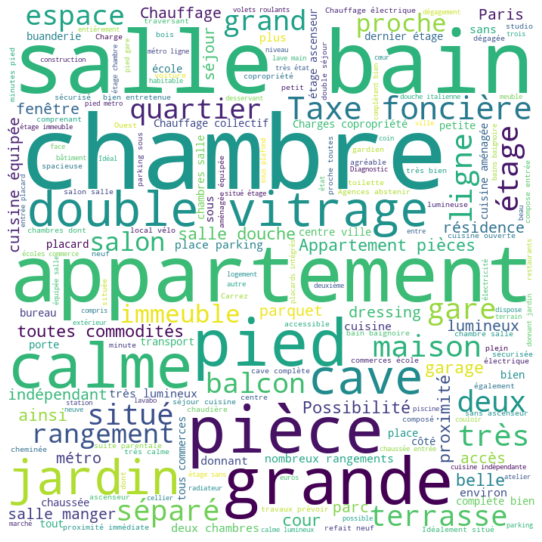

In [24]:
#text= ' '.join(ttx)
wc = WordCloud(width=700, height=700, background_color="white").generate(ttx)
my_dpi = 72
plt.figure(figsize = (700/my_dpi, 700/my_dpi), dpi=my_dpi)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [484]:
#Counter(words_g).most_common(100)

In [686]:
#bigrams_ext = [w for w in ngrams(words_le, n=2)]
#Counter(bigrams_ext).most_common(100)
#d = Counter(bigrams_ext).most_common(20)
#print(bigrams_ext)
#Counter(bigrams_ext).most_common(30)
#Counter(bigrams_ext)

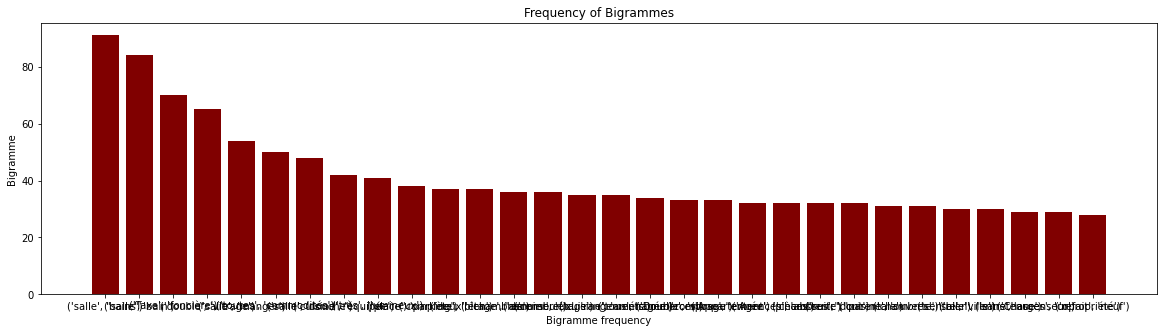

In [25]:
bigrams_ext = [w for w in ngrams(words_le, n=2)]
d = Counter(bigrams_ext).most_common(30)
list2 = []
list1= []
for i in range(len(d)):
    list2.append(str(d[i][0]))
    list1.append(int(d[i][1]))
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(list2, list1, color ='maroon', width = 0.8)
 
plt.xlabel("Bigramme frequency")
plt.ylabel("Bigramme")
plt.title("Frequency of Bigrammes")
plt.show()


In [26]:
def isusefull(val):
    if val[len(val)-1].isalpha() and val[:len(val)-2].isdigit():
        return True
    return False
def fix_it(val):
    if isusefull(val):
        t = []
        for i in range(len(val)-1):
            t.append(val[i])
        a = ''.join(t)
        return a
    return None

In [32]:
fonciere = []
eq_cuisine = []
ascenseur = []
s_cuisine = []
chauffage_co = []
salle_eq = []
for row in df['description']:
    #i+=1
    #print(i)
    tokens = WordPunctTokenizer().tokenize(row)
    tkens_l = [s for s in tokens if s.isalpha() or s.isdigit() or isusefull(s)]
    tokens_cl = [tk for tk in tkens_l if tk not in stopWords]
    #tokens_cl = [s for s in tokens_c if not len(s) < 4]
    bigrams = [w for w in ngrams(tokens_cl, n=2)]
    bigram = set(bigrams)
    flag = True
    f= 0
    e= 0
    p =0
    ad=0
    cv = 0
    s=0
    c=0
    ca = 0
    ce = 0
    se = 0
    for bigr in bigram:
        if bigr== ('Taxe', 'foncière'):
            for j in range(len(tokens_cl)):
                if tokens_cl[j]=='Taxe' and tokens_cl[j+1]=='foncière':
                    if tokens_cl[j+2].isdigit():
                        pin_ = []
                        pin_.append(tokens_cl[j+2])
                        if j+2 < len(tokens_cl)-1:
                            if tokens_cl[j+3].isdigit():
                                pin_.append(tokens_cl[j+3])
                        vv=''.join(pin_)
                        fonciere.append(vv)
                    elif tokens_cl[j+2].isalpha():
                        pin_ = []
                        pin_.append(tokens_cl[j+3])
                        if j+3 < len(tokens_cl)-1:
                            if tokens_cl[j+4].isdigit():
                                pin_.append(tokens_cl[j+4])
                        vv=''.join(pin_)
                        fonciere.append(vv)
                    else : fonciere.append(fix_it(tokens_cl[j+2]))
                    f = f + 1
        if bigr== ('cuisine', 'équipée'):
            e = e +1
            eq_cuisine.append(1)
        if bigr== ('sans', 'ascenseur'):
            p = p +1
            ascenseur.append(1)
        if bigr== ('séjour', 'cuisine'):
            ad = ad +1
            s_cuisine.append(1)
        if bigr== ('Chauffage', 'collectif'):
            cv = cv +1
            chauffage_co.append(1)
        if bigr== ('équipée', 'salle'):
            ca = ca +1
            salle_eq.append(1)
    if f == 0:
        fonciere.append('-1')
    if e == 0:
        eq_cuisine.append(0)
    if p == 0:
        ascenseur.append(0)
    if ad == 0:
        s_cuisine.append(0)
    if cv == 0:
        chauffage_co.append(0)
    if ca == 0:
        salle_eq.append(0)
print(len(chauffage_co))
print(chauffage_co)

262
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
cave = []
chauffage_el = []
vitrage = []
parking = []
baignoire= []
balcon = []
jardin = []
garage=[]
dressing = []
metro = []
bureau=[]
terrasse=[]
for row in df['description']:
    tokens = WordPunctTokenizer().tokenize(row)
    tkens_l = [s for s in tokens if s.isalpha()]
    tokens_cl = [tk for tk in tkens_l if tk not in stopWords]
    #tokens_cl = [s for s in tokens_c if not len(s) < 4]
    #bigrams = [w for w in ngrams(tokens_cl, n=2)]
    tkns = set(tokens_cl)
    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    j=0
    h=0
    g=0
    k=0
    l=0
    m=0
    for t in tkns:
        if t=='vitrage':
            a = a+1
            vitrage.append(1)
        if t=='parking':
            b = b+1
            parking.append(1)
        if t=='cave':
            c = c+1
            cave.append(1)
        if t=='baignoire':
            d = d+1
            baignoire.append(1)
        if t=='balcon':
            e = e+1
            balcon.append(1)
        if t=='terrasse':
            f = f+1
            terrasse.append(1)
        if t=='jardin':
            j = j+1
            jardin.append(1)
        if t=='dressing':
            h = h+1
            dressing.append(1)
        if t=='garage':
            g=g+1
            garage.append(1)
        if t=='métro':
            k= k+1
            metro.append(1)
        if t=='bureau':
            l= l+1
            bureau.append(1)
        if t=='Chauffage':
            m = m+1
            chauffage_el.append(1)
    if a==0:
        vitrage.append(0)
    if b==0:
        parking.append(0)
    if c==0:
        cave.append(0)
    if d==0:
        baignoire.append(0)
    if e==0:
        balcon.append(0)
    if f==0:
        terrasse.append(0)
    if j==0:
        jardin.append(0)
    if h==0:
        dressing.append(0)
    if g==0:
        garage.append(0)
    if k==0:
        metro.append(0)
    if l==0:
        bureau.append(0)
    if m==0:
        chauffage_el.append(0)
print(len(vitrage))
print(terrasse)            

262
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [34]:
ascenseur_a=[]

ar = []
for i in range(len(ascenseur)):
    if ascenseur[i]==1:
        ar.append('0')
    else : ar.append('1')
for i in range(len(ar)):
    if ar[i]=='1':
        ascenseur_a.append(1)
    elif ar[i]=='0' :
        ascenseur_a.append(1)
print(len(ascenseur_a))
print(ascenseur_a)

262
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:
ascenseurs=[]
#for i in range(len(df['description'])):
for j in range(len(ascenseur_a)):
    if ascenseur_a[j]==0:
        ascenseurs.append(0)
    else : 
        i=0
        token = WordPunctTokenizer().tokenize(df['description'][j])
        for tk in token:
            if tk=='ascenseur':
                i =+1
                ascenseurs.append(1)
                break
        if i==0:
            ascenseurs.append(0)
print(len(ascenseurs))
print(ascenseurs)

262
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [693]:
#Counter(words_le).most_common(100)

In [694]:
#df['description'][194]

In [609]:
tokens = WordPunctTokenizer().tokenize(df['description'][221])
tokens_cl = [s for s in tokens if s.isalpha() or s.isdigit() or isusefull(s)]
tokens_cl

['Maison',
 'individuelle',
 'non',
 'mitoyenne',
 'en',
 'limite',
 'de',
 'propriété',
 'Pour',
 'toute',
 'visite',
 'il',
 'sera',
 'demandé',
 'de',
 'compléter',
 'un',
 'dossier',
 'sur',
 'dossierfacile',
 'fr',
 'Situé',
 'au',
 'calme',
 'à',
 'proximité',
 'des',
 'espaces',
 'verts',
 'parc',
 'd',
 'Orsay',
 'zone',
 'boisée',
 'à',
 '200',
 'm',
 'à',
 '10',
 'min',
 'à',
 'pied',
 'du',
 'centre',
 'ville',
 'et',
 'proche',
 'de',
 'toutes',
 'commodités',
 'commerces',
 'écoles',
 'et',
 'transports',
 'Idéalement',
 'desservie',
 'proche',
 'de',
 'N',
 '118',
 'RER',
 'B',
 'à',
 '15',
 'min',
 'à',
 'pied',
 'navette',
 'gare',
 'à',
 '200',
 'm',
 'Belle',
 'maison',
 'de',
 'caractère',
 'pleine',
 'de',
 'charme',
 'double',
 'exposition',
 'Est',
 'Ouest',
 'd',
 'une',
 'superficie',
 'de',
 '126',
 'au',
 'sol',
 '115',
 'Carrez',
 'édifiée',
 'sur',
 'une',
 'parcelle',
 'de',
 '450',
 'comprenant',
 'Au',
 'rez',
 'de',
 'chaussée',
 'surélevé',
 'pierre',
 

In [550]:
print(fonciere[229])
df['description'][229]


an


"Belle maison de 217 m² avec jardin de 2000m², exposée Sud-Est au calme, à quelques pas de la Mairie, et du centre, à quelques minutes en voitures d’Etréchy, et de toutes commodités (écoles, commerces, transports – à 4km de la gare RER C).\n\nElle se compose d’une entrée avec placard desservant un double séjour lumineux (85m²) avec baies vitrées donnant sur le jardin, cuisine américaine équipée avec îlot central, une chambre et une salle de sport avec placards, salle d’eau privée (comprenant cabine de douche et lavabo) et un wc séparé avec lave-mains.\n\nA l’étage, un palier dessert 4 chambres avec placards intégrés dont une suite parentale avec dressing et salle de bains (à finir), une salle de bains avec baignoire et lavabo, et un wc séparé avec lave-mains.\n\nA l’extérieur, la terrasse donne sur un jardin entièrement clos et piscinable.\n\nUn sous-sol total de 135m2 (possibilité de garer plusieurs voitures)\n\nPompe à chaleur neuve, ballon thermodynamique, double vitrage, stores éle

In [581]:
a = '546d'
b=[]
for i in a:
    if i.isdigit():
        print("yes")
        b.append(i)
    else : print("non")
b
clp = ''.join(b)
print(clp)

yes
yes
yes
non
546


In [329]:
df['description'][240]

'Très bien situé, dans une rue calme, proche de toutes commodités (espaces verts, commerces, banques, opticien, restaurants, écoles ..), à 6 min à pied du centre commercial " La Vache noire", idéalement desservie (nombreux bus à 3 min à pied)\n\nAu 6ème et dernier étage d\'une charmante copropriété bien entretenue et sécurisée par digicode.\n\nLumineux 2 pièces d\'une superficie de 42,53 m² comprenant :\n\nune entrée desservant une belle pièce de vie exposée plein Sud, une cuisine fermée, une chambre avec nombreux rangements, une salle d\'eau, wc séparés.\n\nChauffage collectif, double vitrage, une cave\nPossibilité achat parking à proximité.\n\nCharges copropriété : 1.920€\nTaxe foncière : 430€\n\nDPE réalisé.'

In [269]:
do = df
print(do['prix'][18])
print(do['prix'][17])
tkon = WordPunctTokenizer().tokenize(do['prix'][18])
nbm = ''
for i in tkon:
    if i.isdigit():
        nbm = nbm + i
print(nbm)

1.160.000 €
750.000 €
1160000


In [294]:
do['description'][0]

"Maison située au centre ville de Pavillons sous bois à La Basoche.\n\nDans un coin très calme, à 10 minutes à pied de la gare de tramway Les Pavillons sous bois, et de l'école Alliance.\n\nElle se compose comme suit, au rez-de-chaussé, une véranda, un salon/salle à manger, une cuisine et un toilette\nA l'étage 2 chambres ainsi qu'une salle de bain avec toilette.\n\nUn garage fermé de 35 m2\n\nTout cela sur une parcelle de 222m²\n\nPossibilité d'agrandissement\n\nN'hésitez pas à me contacter, direct propriétaire. Agence s'abstenir."

In [310]:
for t in df['description']:
    print(t)

Maison située au centre ville de Pavillons sous bois à La Basoche.

Dans un coin très calme, à 10 minutes à pied de la gare de tramway Les Pavillons sous bois, et de l'école Alliance.

Elle se compose comme suit, au rez-de-chaussé, une véranda, un salon/salle à manger, une cuisine et un toilette
A l'étage 2 chambres ainsi qu'une salle de bain avec toilette.

Un garage fermé de 35 m2

Tout cela sur une parcelle de 222m²

Possibilité d'agrandissement

N'hésitez pas à me contacter, direct propriétaire. Agence s'abstenir.
Rare très calme et lumineux.

Idéalement situé dans un secteur prisé, cet appartement traversant et parfaitement distribué est particulièrement calme et lumineux.

Baies vitrées et balcons ornent chaque pièce de vie.
Beau séjour avec parquet et balcon filant.
Deux grandes chambres : 1 orientée Nord/Ouest sur rue non passante et 1 autre orientée Sud/Est, au dessus des arbres et sans aucun vis-à-vis. Idéal pour prendre son petit-déjeuner au soleil et au chant des oiseaux !


In [48]:
dictu={'type_vente':types_, 'nom_commune':nom_commune, 'code_departement':codedep,'code_commune':codecomm, 'prix_vente':price, 'nb_pieces':pieces, 'nb_chambres':chambres, 'sbien_m²':met,
   'sterrain_m²':terrains, 'prix_m²':pri, 'taxe_fonciere':fonciere, 'cuisine_equipee':eq_cuisine, 'chauffage_collectif':chauffage_co, 'sejour_cuisine':s_cuisine, 'salle_equipee':salle_eq,
   'ascenseur':ascenseur_a, 'cave':cave, 'chauffage':chauffage_el, 'vitrage':vitrage, 'parking':parking, 'baignoire':baignoire, 'balcon':balcon,
   'jardin':jardin, 'garage':garage, 'dressing':dressing, 'approximite_metro':metro, 'bureau':bureau, 'terrasse':terrasse}
date_new= pd.DataFrame(data=dictu)
date_new.to_csv('house_sell_data')
date_new

,type_vente,nom_commune,code_departement,code_commune,prix_vente,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,prix_m²,...,vitrage,parking,baignoire,balcon,jardin,garage,dressing,approximite_metro,bureau,terrasse
0,Maison,Les Pavillons-sous-Bois,93,93057,359000,4,2,75,222,4787,...,0,0,0,0,0,1,0,0,0,0
1,Appartement,Paris 15e Arrondissement,75,75056,750000,3,2,73,0,10274,...,0,1,1,1,0,0,1,1,0,0
2,Maison,Nanterre,92,92050,550000,3,2,80,209,6875,...,0,0,0,0,1,0,0,0,0,0
3,Appartement,Paris 11e Arrondissement,75,75056,518000,2,1,44,0,0,...,1,0,0,0,0,0,1,1,0,0
4,Appartement,Alfortville,94,94002,260000,2,1,43,0,6047,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Appartement,Courbevoie,92,92026,525000,3,2,70,0,7500,...,1,1,0,1,1,0,0,0,0,0
258,Maison,Le Raincy,93,93062,376000,3,2,63,0,0,...,1,0,0,0,1,0,0,0,0,0
259,Appartement,Franconville,95,95252,153000,0,0,23,0,6652,...,0,1,0,0,1,0,0,0,0,1
260,Appartement,Bry-sur-Marne,94,94015,310000,3,2,68,0,4559,...,1,1,0,0,0,0,0,0,0,0


In [7]:
types_cd=[]
for i in types_:
    if i=='Maison':
        types_cd.append(1)
    else : types_cd.append(0)
print(len(types_cd))

262


In [49]:
dic={'type_vente':types_cd, 'code_departement':codedep,'code_commune':codecomm, 'prix_vente':price, 'nb_pieces':pieces, 'nb_chambres':chambres, 'sbien_m²':met,
   'sterrain_m²':terrains, 'prix_m²':pri, 'taxe_fonciere':fonciere, 'cuisine_equipee':eq_cuisine, 'chauffage_collectif':chauffage_co, 'sejour_cuisine':s_cuisine, 'salle_equipee':salle_eq,
   'ascenseur':ascenseur_a, 'cave':cave, 'chauffage':chauffage_el, 'vitrage':vitrage, 'parking':parking, 'baignoire':baignoire, 'balcon':balcon,
   'jardin':jardin, 'garage':garage, 'dressing':dressing, 'approximite_metro':metro, 'bureau':bureau, 'terrasse':terrasse}
date_n= pd.DataFrame(data=dic)
date_n.to_csv('house_sell_data_models')
date_n

,type_vente,code_departement,code_commune,prix_vente,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,prix_m²,taxe_fonciere,...,vitrage,parking,baignoire,balcon,jardin,garage,dressing,approximite_metro,bureau,terrasse
0,1,93,93057,359000,4,2,75,222,4787,-1,...,0,0,0,0,0,1,0,0,0,0
1,0,75,75056,750000,3,2,73,0,10274,1155,...,0,1,1,1,0,0,1,1,0,0
2,1,92,92050,550000,3,2,80,209,6875,-1,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,518000,2,1,44,0,0,511,...,1,0,0,0,0,0,1,1,0,0
4,0,94,94002,260000,2,1,43,0,6047,-1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,92,92026,525000,3,2,70,0,7500,850,...,1,1,0,1,1,0,0,0,0,0
258,1,93,93062,376000,3,2,63,0,0,950,...,1,0,0,0,1,0,0,0,0,0
259,0,95,95252,153000,0,0,23,0,6652,-1,...,0,1,0,0,1,0,0,0,0,1
260,0,94,94015,310000,3,2,68,0,4559,-1,...,1,1,0,0,0,0,0,0,0,0
